In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [3]:
import pymc3 as pm
np.random.seed(1000)

## 단순 선형 회귀

+ np.polyfit 명령으로 단순 선형 회귀 가능

In [5]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

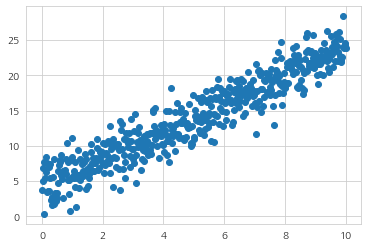

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
# model + training
reg = np.polyfit(x, y, 1)
reg

array([1.99250739, 4.04994912])

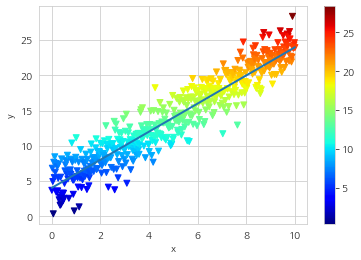

In [10]:
plt.scatter(x, y, c=y, marker='v', cmap=mpl.cm.jet)
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)  # model 추정 
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 베이지안 회귀

In [12]:
with pm.Model() as model:
    # PyMC3의 모형은 with 문안에서 사용된다.
    # 사전확률 정의
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # 선형회귀 모형 정의
    y_est = alpha + beta * x
    
    # 가능도 분포 정의
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # 최적화를 통해 시작값 추정
    start = pm.find_MAP()
    
    # NUTS MCMC 샘플링 알고리즘 인스턴스 생성
    step = pm.NUTS(scaling=start)
    
    # 샘플링을 사용하여 100개 사후샘플 생성
    trace = pm.sample(100, step=step, start=start, progressbar=False)

logp = -1,067.3, ||grad|| = 78.647: 100%|██████████| 27/27 [00:00<00:00, 1504.67it/s]  
Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


In [14]:
trace[0]

{'alpha': 4.102013379604605,
 'beta': 1.9997758626352158,
 'sigma_interval__': -1.380564170552078,
 'sigma': 2.0091840677160047}

In [16]:
len(trace)

100

In [17]:
trace[1]

{'alpha': 4.099759901283963,
 'beta': 1.962851015713956,
 'sigma_interval__': -1.4001726366764216,
 'sigma': 1.9778871803724407}

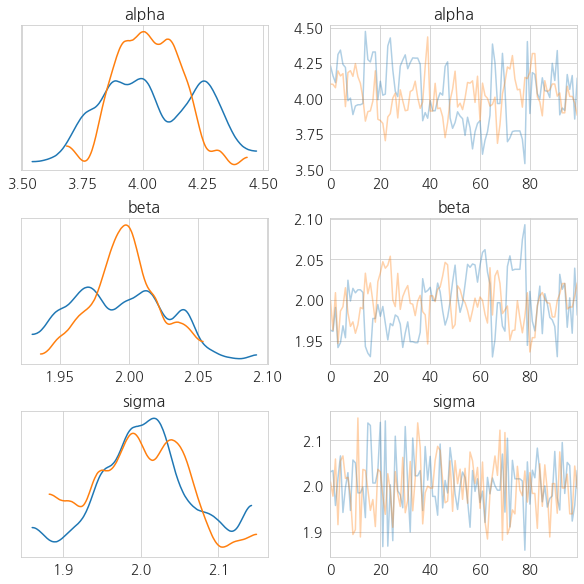

In [18]:
pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2}, figsize=(8, 8))
plt.show()

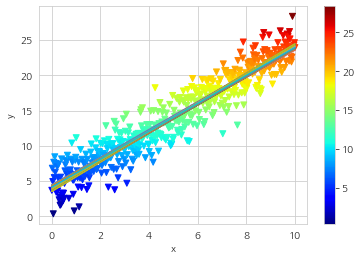

In [21]:
plt.scatter(x, y, c=y, marker='v', cmap=mpl.cm.jet)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)